In [1]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
#import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
#from codes.experimentclasses.RigidEthanolPCA2 import RigidEthanolPCA2
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter
from einops import rearrange

/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:

#set parameters
n = 50000
#n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
#itermax = 1000 #maximum iterations per lasso run
#tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 1. #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0, 0, 0, 1, 1, 1, 2, 2])
jj = np.asarray([4, 5, 1, 6, 7, 2, 3, 8])
#run experiment
#these are just for loading... probably not necessary
atoms4 = np.asarray([[4,0,1,2],[0,1,2,3],[3,2,1,8],[4,0,1,5]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

folder = workingdirectory + '/Figures/malonaldehyde/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/malonaldehyde_110120_nsel100_nreps25.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
savename = 'malonaldehyde_110120'
savefolder = 'malonaldehyde'
loadfolder = 'malonaldehyde'
loadname = 'malonaldehyde_110120'
data_wd = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'
if new_MN == True:
    experiment = MalonaldehydeAngles(dim, ii, jj,cores,atoms4)
    projector  = np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50_components.npy')
    experiment.M = experiment.load_data(data_wd)  # if noise == False then noise parameters are overriden
    experiment.Mpca = RiemannianManifold(np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50.npy'), dim)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)


In [3]:

#set parameters
n = 50000
#n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
#itermax = 1000 #maximum iterations per lasso run
#tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 1. #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
natoms = 9
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0, 0, 0, 1, 1, 1, 2, 2])
jj = np.asarray([4, 5, 1, 6, 7, 2, 3, 8])
#run experiment
#these are just for loading... probably not necessary
atoms4 = np.asarray([[4,0,1,2],[0,1,2,3],[3,2,1,8],[4,0,1,5]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

folder = workingdirectory + '/Figures/malonaldehyde/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/malonaldehyde_110120_nsel100_nreps25.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
savename = 'malonaldehyde_110120'
savefolder = 'malonaldehyde'
loadfolder = 'malonaldehyde'
loadname = 'malonaldehyde_110120'
data_wd = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'
if new_MN == True:
    experiment = MalonaldehydeAngles(dim, ii, jj,cores,atoms4)
    projector  = np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50_components.npy')
    experiment.M = experiment.load_data(data_wd)  # if noise == False then noise parameters are overriden
    experiment.Mpca = RiemannianManifold(np.load(data_wd + '/untracked_data/chemistry_data/malonaldehydeangles022119_pca50.npy'), dim)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)


In [ ]:
#(array([691, 697]),)
#(array([697, 733]),)
#(array([691, 697]),)
#(array([691, 732]),)
#(array([691, 697]),)

In [4]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
atoms4 = get_all_atoms_4(9)[0]

In [5]:
atoms4[[691, 697,733,732]]

array([[4, 3, 6, 8],
       [4, 3, 7, 8],
       [5, 4, 6, 8],
       [4, 5, 6, 8]])

In [6]:
g1fast =  experiment.get_g_full_sub(experiment.M.data, np.asarray([4, 3, 6, 8]))
g2fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([4, 3, 7, 8]))
g3fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([5, 4, 6, 8]))
g4fast = experiment.get_g_full_sub(experiment.M.data, np.asarray([4, 5, 6, 8]))

Text(0.5, 0, '3')

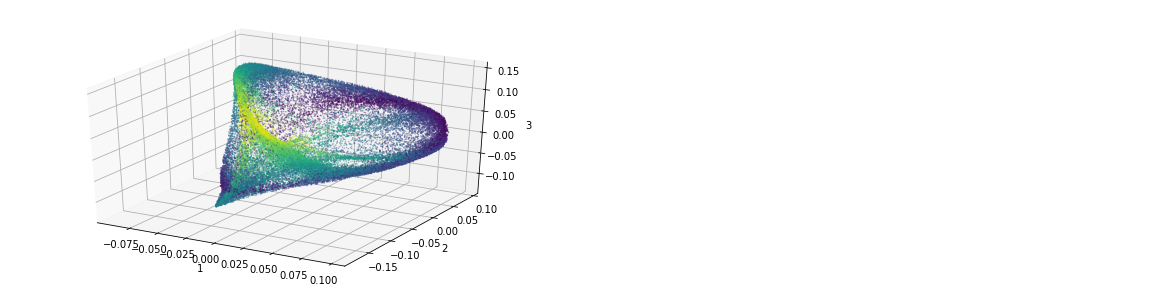

In [7]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]

#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g1fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

Text(0.5, 0, '3')

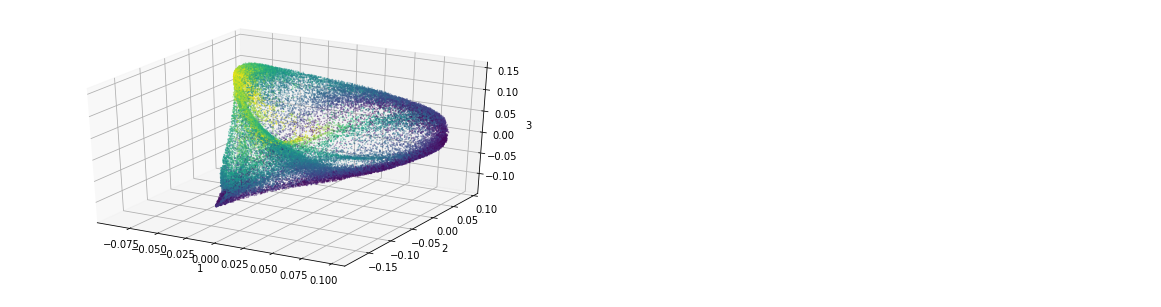

In [8]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]

#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g2fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

Text(0.5, 0, '3')

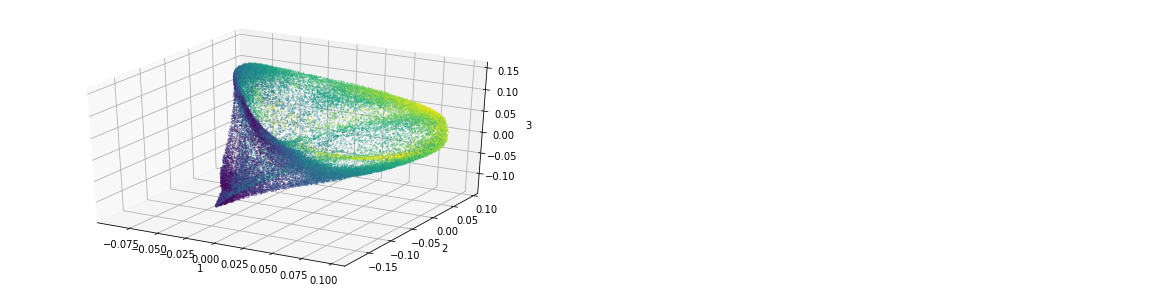

In [9]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]

#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g3fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

Text(0.5, 0, '3')

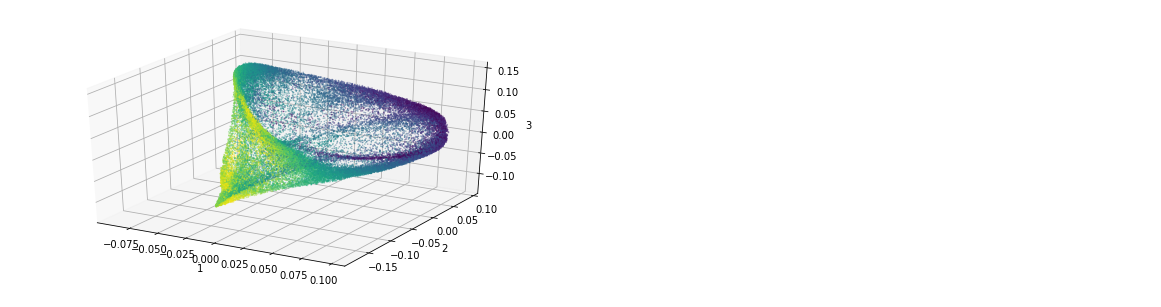

In [10]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,1, figsize = (20,5))
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5

axs[0].set_axis_off()
axs[1].set_axis_off()

ax = fig.add_subplot(1, 2, 1, projection='3d')

selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]

#fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z, c = g4fast, s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')